Mining Social and Geographic Datasets
-----------------------------------

GEOG0051 Computer Lab 3.2: Street Network Analysis with OSMnx
-------------------------------

Note: Notebook might contain scripts and instructions adapted from GEOG0115, GEOG0051. 
Contributors: Stephen Law, Mateo Neira, Nikki Tanu, Thomas Keel, Gong Jie, Jason Tang and Demin Hu.

Overview of Content in this Jupyter Notebook
===============


### What is OSMnx?

**OSMnx** (OpenStreetMap network) is a Python package that allows you to:
- Download street networks from OpenStreetMap with a single line of code
- Get network data for driving, walking, or biking
- Analyze urban infrastructure using NetworkX functions
- Visualize networks on maps using GeoPandas


**If you want to learn more about OSMnx**:
- [Original Paper: Boeing, G. 2017. "OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks."](https://geoffboeing.com/publications/osmnx-complex-street-networks/)

- [Many examples from Geoff Boeing](https://github.com/gboeing/osmnx-examples/)

---

> ### Lab Notebook 3.2: OSMnx for Street Networks

> ### Lab Exercise 3.2: Street Networks in London

## Quick Recap: NetworkX from Week 2

Before we dive into OSMnx, let's do a quick recap of key NetworkX concepts from Week 2. 

### Quick Example: Simple Street Network


In [6]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import geopandas as gpd
import contextily as ctx
import matplotlib.cm as cm
import matplotlib.colors as colors


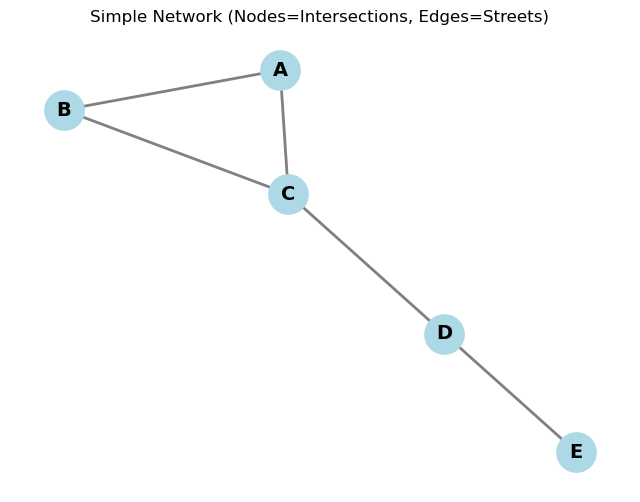

Number of nodes (intersections): 5
Number of edges (streets): 5


In [7]:
# Quick recap: Create a simple graph representing intersections and streets
G_simple = nx.Graph()

# Add edges (streets connecting intersections)
G_simple.add_edges_from([('A','B'), ('A','C'), ('B','C'), ('C','D'), ('D','E')])


fig, ax = plt.subplots(figsize=(8, 6))
pos = nx.spring_layout(G_simple)
nx.draw(G_simple, pos, 
        node_color='lightblue', 
        node_size=800, 
        with_labels=True, 
        font_weight='bold',
        font_size=14,
        edge_color='gray',
        width=2)
plt.title("Simple Network (Nodes=Intersections, Edges=Streets)", fontsize=12)
plt.show()

print(f"Number of nodes (intersections): {G_simple.number_of_nodes()}")
print(f"Number of edges (streets): {G_simple.number_of_edges()}")

In [8]:
# Calculate degree centrality
degree_cent = nx.degree_centrality(G_simple)
print("Degree Centrality (which intersection is most connected?):")
for node, value in sorted(degree_cent.items(), key=lambda x: x[1], reverse=True):
    print(f"  Intersection {node}: {value:.3f}")



Degree Centrality (which intersection is most connected?):
  Intersection C: 0.750
  Intersection A: 0.500
  Intersection B: 0.500
  Intersection D: 0.500
  Intersection E: 0.250


Shortest path from A to E: A → C → D → E


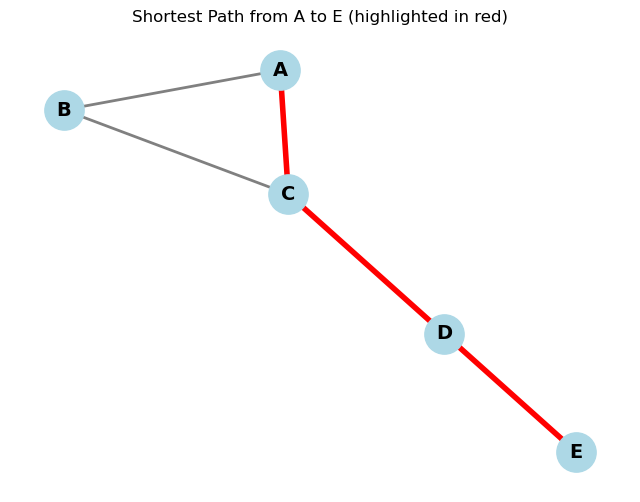

In [9]:
# Find shortest path (from Week 2)
path = nx.shortest_path(G_simple, source='A', target='E')
print(f"Shortest path from A to E: {' → '.join(path)}")


fig, ax = plt.subplots(figsize=(8, 6))
path_edges = list(zip(path[:-1], path[1:]))

nx.draw(G_simple, pos, 
        node_color='lightblue', 
        node_size=800, 
        with_labels=True, 
        font_weight='bold',
        font_size=14,
        edge_color='gray',
        width=2)

# Highlight the path
nx.draw_networkx_edges(G_simple, pos, edgelist=path_edges, edge_color='red', width=4)
plt.title("Shortest Path from A to E (highlighted in red)", fontsize=12)
plt.show()

## Downloading Street Networks with OSMnx



Download a network for an entire place (city, neighborhood, etc.) that OpenStreetMap recognizes.

```python
ox.graph_from_place(query, network_type='all_private', simplify=True, ...)
```

**Key parameter: `network_type`**
- `'drive'`: Roads accessible by car
- `'walk'`: Paths accessible by foot (includes sidewalks, pedestrian paths)
- `'bike'`: Paths accessible by bicycle
- `'all'`: All street types

[See OSMnx documentation for more details](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_from_address#osmnx.graph.graph_from_address)

In [10]:
# Download the street network for Cambridge, UK (driving network)

G_cambridge = ox.graph_from_place('Cambridge, UK', network_type='drive')

print(f"Downloaded street network for Cambridge:")
print(f"  Nodes (intersections): {G_cambridge.number_of_nodes():,}")
print(f"  Edges (street segments): {G_cambridge.number_of_edges():,}")

Downloaded street network for Cambridge:
  Nodes (intersections): 3,322
  Edges (street segments): 7,288


### Method 2: `graph_from_address()`

Download a network within a certain distance from a specific address. This is more precise and often faster than downloading an entire city.

```python
ox.graph_from_address(address, dist=1000, network_type='drive', ...)
```

**Key parameters**:
- `address`: Any address that can be geocoded (e.g., "Trafalgar Square, London")
- `dist`: Distance in meters from the address
- `network_type`: Same options as above (drive, walk, bike, all)

[See documentation](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_from_address#osmnx.graph.graph_from_address)

In [11]:
# Download network around Trafalgar Square (1200m radius, driving)
G = ox.graph_from_address('Trafalgar Square, London', dist=1200, network_type='drive')

print(f"Downloaded street network around Trafalgar Square:")
print(f"  Nodes: {G.number_of_nodes():,}")
print(f"  Edges: {G.number_of_edges():,}")

Downloaded street network around Trafalgar Square:
  Nodes: 926
  Edges: 1,820


#### 🤨 TASK
Download a new graph called `G2` from `'Central Station, Hong Kong'` with `dist=800` meters for `network_type='drive'`.

In [12]:
# Task: Download Hong Kong Central Station network
G2 = ox.graph_from_address('Central Station, Hong Kong', dist=800, network_type='drive')

print(f"Hong Kong Central Station network:")
print(f"  Nodes: {G2.number_of_nodes():,}")
print(f"  Edges: {G2.number_of_edges():,}")

Hong Kong Central Station network:
  Nodes: 369
  Edges: 610


## Using NetworkX Functions with OSMnx Data

**Key point**: OSMnx graphs are NetworkX graphs. This means you can use all the NetworkX functions.


In [13]:

# Each node represents a street intersection and has attributes like coordinates
print("First 5 nodes with their attributes:")
for node, attrs in list(G.nodes(data=True))[:5]:
    print(f"  Node {node}: lat={attrs['y']:.5f}, lon={attrs['x']:.5f}")

First 5 nodes with their attributes:
  Node 107322: lat=51.51625, lon=-0.13287
  Node 107324: lat=51.51565, lon=-0.13244
  Node 107326: lat=51.51515, lon=-0.13273
  Node 107328: lat=51.51484, lon=-0.13232
  Node 107333: lat=51.51531, lon=-0.14197


In [14]:

print("First 5 edges:")
for edge in list(G.edges())[:5]:
    print(f"  {edge}")

First 5 edges:
  (107322, 5239543922)
  (107322, 7261577394)
  (107322, 9521035)
  (107324, 1694551556)
  (107324, 5877163201)


In [15]:
# Convert to Pandas DataFrame
df_edges = nx.to_pandas_edgelist(G)
print("Street network as a DataFrame:")
df_edges.head()

Street network as a DataFrame:


source      target                                           geometry  \
0  107322  5239543922                                                NaN   
1  107322  7261577394  LINESTRING (-0.1328665 51.5162463, -0.132747 5...   
2  107322     9521035  LINESTRING (-0.1328665 51.5162463, -0.1330144 ...   
3  107324  1694551556  LINESTRING (-0.1324426 51.5156506, -0.1321033 ...   
4  107324  5877163201  LINESTRING (-0.1324426 51.5156506, -0.1324897 ...   

   oneway maxspeed width est_width service      length bridge           name  \
0   False   20 mph   NaN       NaN     NaN    6.073995    NaN    Soho Street   
1   False   20 mph   NaN       NaN     NaN  174.112966    NaN  Oxford Street   
2   False   20 mph   NaN       NaN     NaN  124.831601    NaN  Oxford Street   
3    True   20 mph   NaN       NaN     NaN   74.927392    NaN    Soho Square   
4   False   20 mph   NaN       NaN     NaN   53.417109    NaN    Soho Street   

  reversed lanes junction      highway tunnel  ref  \
0     True   NaN      NaN  residential    NaN  NaN   
1     True     2      NaN      primary    NaN  A40   
2    False     2      NaN      primary    NaN  A40   
3    False   NaN      NaN  residential    NaN  NaN   
4    False   NaN      NaN  residential    NaN  NaN   

                             osmid access  
0                        622159392    NaN  
1                         33096423    NaN  
2  [33096424, 972210875, 93773949]    NaN  
3                          4082521    NaN  
4                         59207650    NaN

what do you notice from the dataframe?

### Downloading Other Infrastructure Networks

OSMnx can download more than just street networks. Using `custom_filter`, you can get railways, waterways, and more.

**Note**: Railway data may be less complete than road data in OpenStreetMap.

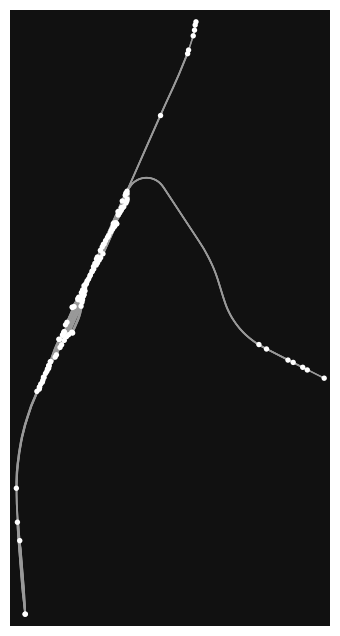

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [16]:
# Download railway network for Cambridge
G_railway = ox.graph_from_place('Cambridge, UK', custom_filter='["railway"]')

ox.plot_graph(G_railway)

## Plotting Street Network Graphs

OSMnx provides a convenient `plot_graph()` function for visualizing street networks.

```python
ox.plot_graph(G, ax=None, figsize=(8, 8), bgcolor='#111111', 
              node_color='w', node_size=15, edge_color='#999999', ...)
```

[See documentation for all parameters](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=plot_graph#osmnx.plot.plot_graph)

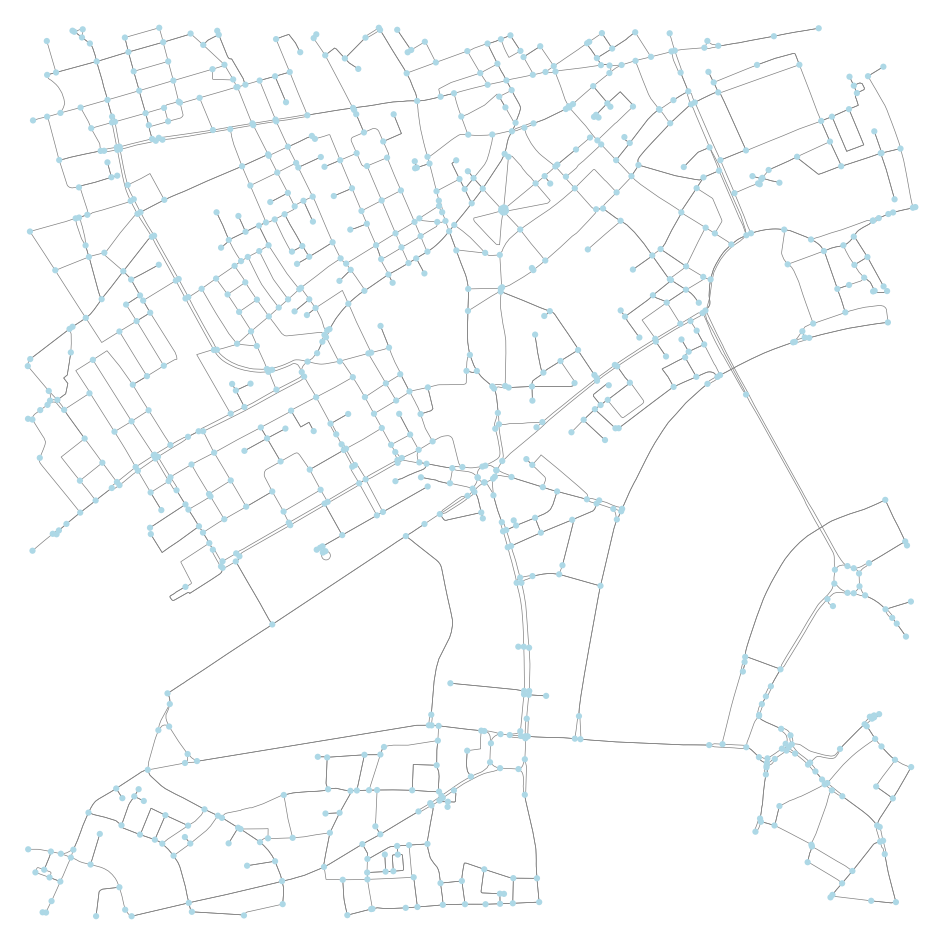

In [17]:
# Plot the Trafalgar Square network
fig, ax = ox.plot_graph(G, figsize=(12, 12), 
                        node_color='lightblue', 
                        node_size=20, 
                        edge_color='gray', 
                        edge_linewidth=0.5,
                        bgcolor='white')
plt.show()

## Finding Shortest Paths in Street Networks

In [18]:
# Define origin and destination points
origin_point = [51.508056, -0.128056]  # Trafalgar Square [lat, lon]
destination_point = [51.515312, -0.142025]  # Oxford Street [lat, lon]

# Find nearest nodes in the network
# Note: ox.nearest_nodes takes (G, X, Y) where X=longitude, Y=latitude
origin_node = ox.nearest_nodes(G, origin_point[1], origin_point[0])
destination_node = ox.nearest_nodes(G, destination_point[1], destination_point[0])

print(f"Origin node ID: {origin_node}")
print(f"Destination node ID: {destination_node}")

# Find shortest path
# 'weight' parameter uses edge lengths to find the shortest physical distance
route = nx.shortest_path(G, origin_node, destination_node, weight='length')

print(f"\nRoute found with {len(route)} nodes")
print(f"Route node IDs: {route[:5]}... (showing first 5)")

Origin node ID: 107774
Destination node ID: 25496587

Route found with 35 nodes
Route node IDs: [107774, 25504189, 1274040745, 3439409148, 26671718]... (showing first 5)


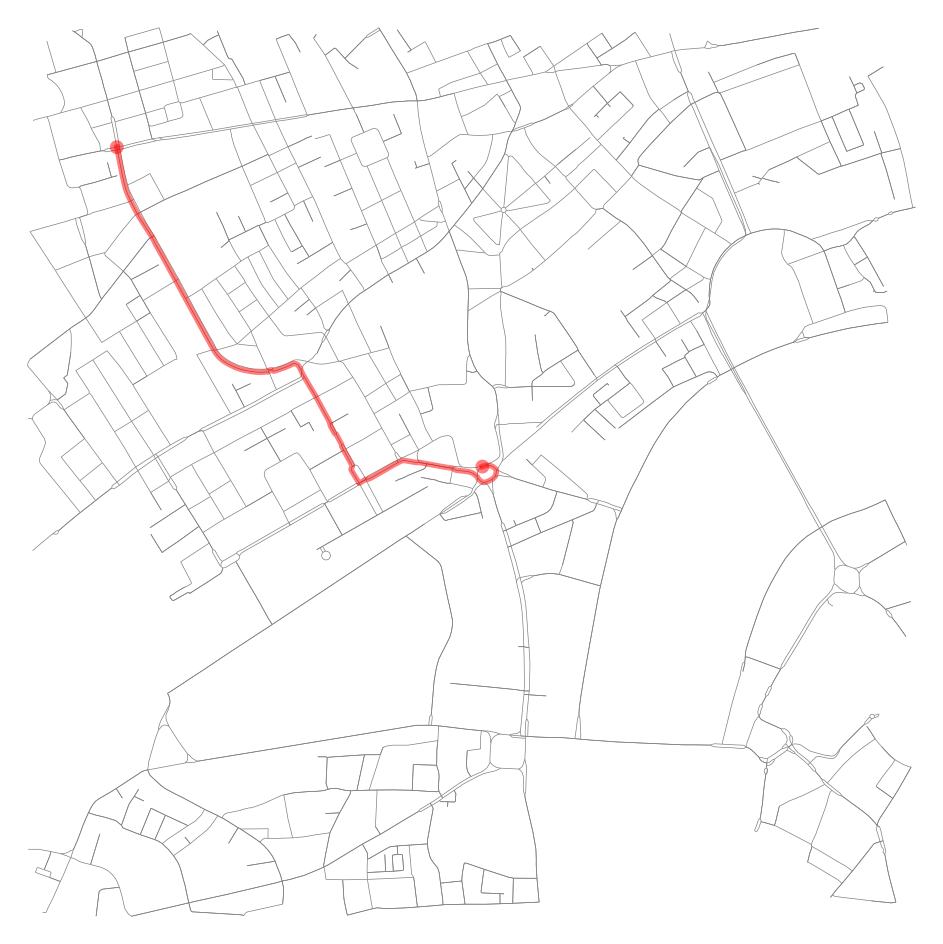

In [19]:
# Visualize the route
fig, ax = ox.plot_graph_route(G, route, 
                               route_color='red', 
                               route_linewidth=4, 
                               node_size=0,
                               bgcolor='white',
                               edge_color='gray',
                               edge_linewidth=0.5,
                               figsize=(12, 12))
plt.show()

#### 🤨 TASK
Find the shortest path between Trafalgar Square and Covent Garden.

**Hint**: Use map services or `ox.geocode('Covent Garden, London')` to find coordinates.

Route from Trafalgar Square to Covent Garden:
  Number of nodes: 13


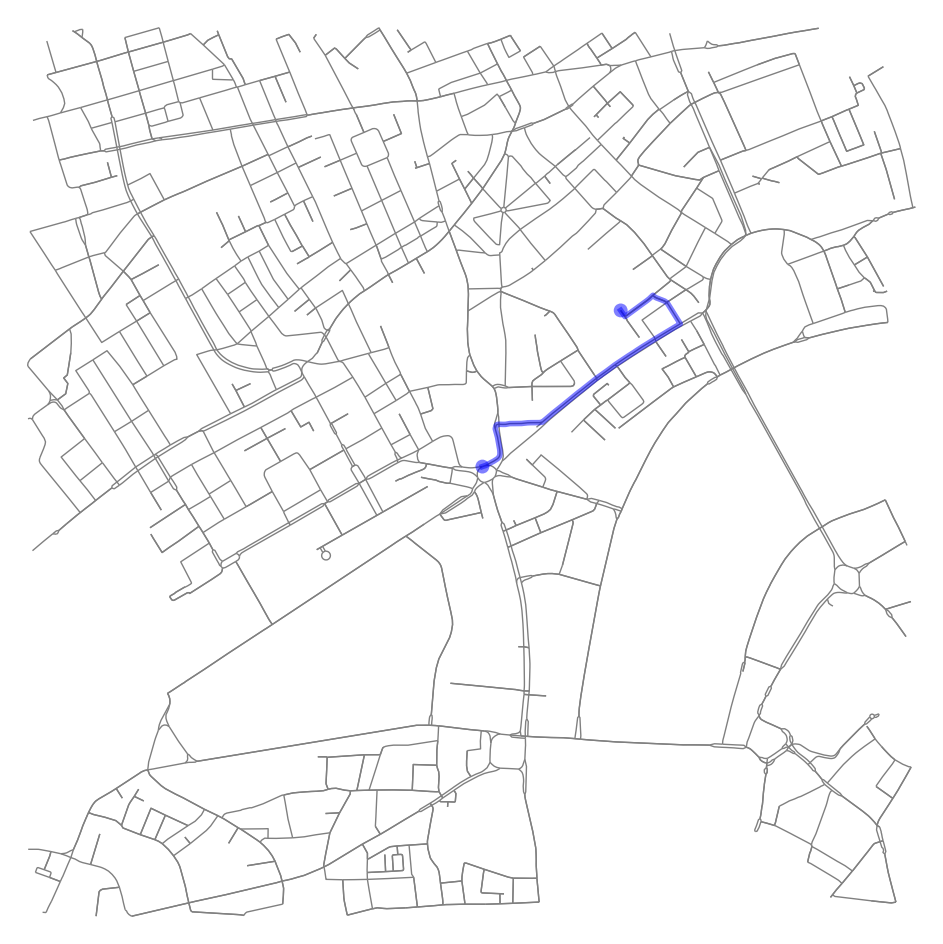

In [20]:
# Task: Find shortest path from Trafalgar Square to Covent Garden
trafa_point = [51.508056, -0.128056]  # Trafalgar Square
covent_point = [51.511671, -0.123631]  # Covent Garden

# Find nearest nodes
trafa_node = ox.nearest_nodes(G, trafa_point[1], trafa_point[0])
covent_node = ox.nearest_nodes(G, covent_point[1], covent_point[0])

# Find shortest path
route_covent = nx.shortest_path(G, trafa_node, covent_node, weight='length')

print(f"Route from Trafalgar Square to Covent Garden:")
print(f"  Number of nodes: {len(route_covent)}")

# Visualize
fig, ax = ox.plot_graph_route(G, route_covent, 
                               route_color='blue', 
                               route_linewidth=4,
                               node_size=0,
                               bgcolor='white',
                               edge_color='gray',
                               figsize=(12, 12))
plt.show()

### Interactive Exploration with GeoPandas

Remember GeoPandas from Week 3.1? We can convert OSMnx graphs to GeoDataFrames and use the `explore()` method for interactive maps!

**Note**: This creates interactive maps but might be slow with large networks.

In [21]:
# Convert graph to GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

# Create interactive map
base_map = gdf_edges.explore(color='red', style_kwds={'weight': 2, 'opacity': 0.7})
base_map

## Street Network Statistics

OSMnx provides a `basic_stats()` function to calculate useful network metrics.

[See documentation for all statistics](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=basic%20stats#osmnx.stats.basic_stats)

In [22]:
# Calculate basic statistics
stats = ox.basic_stats(G)

# Display key statistics
print("Street Network Statistics for Trafalgar Square Area:")
print(f"  Number of nodes: {stats['n']:,}")
print(f"  Number of edges: {stats['m']:,}")
print(f"  Average street length: {stats['street_length_avg']:.1f}m")
print(f"  Average streets per node: {stats['streets_per_node_avg']:.2f}")

Street Network Statistics for Trafalgar Square Area:
  Number of nodes: 926
  Number of edges: 1,820
  Average street length: 67.2m
  Average streets per node: 2.91


## Centrality Measures for Street Networks

For **street networks**, we often want **edge-level centrality** (e.g., which street segment is most important for traffic flow).

1. **Degree Centrality**: How many connections does a node/edge have?
2. **Closeness Centrality**: How close is a node/edge to all others?
3. **Betweenness Centrality**: How often does a node/edge appear on shortest paths?


In [23]:

G_small = ox.graph_from_address('Oxford Circus, London', dist=800, network_type='drive')

print(f"Smaller network for centrality analysis:")
print(f"  Nodes: {G_small.number_of_nodes():,}")
print(f"  Edges: {G_small.number_of_edges():,}")

Smaller network for centrality analysis:
  Nodes: 595
  Edges: 1,172


### Converting to DiGraph

Some centrality measures require directed graphs. OSMnx graphs are MultiGraphs (multiple edges between nodes), so we need to convert them.

In [24]:
# Convert to DiGraph (directed graph)
DG = ox.convert.to_digraph(G_small)

### Edge-Level Degree Centrality

Now let's calculate degree centrality for **edges** (streets).

In [25]:
# Calculate edge degree centrality using line graph
edge_dc = nx.degree_centrality(nx.line_graph(DG))

# Set as edge attribute
nx.set_edge_attributes(DG, edge_dc, 'dc')

# Convert back to MultiGraph
G1 = nx.MultiGraph(DG)

print("Top 5 street segments by degree centrality:")
for edge, dc in sorted(edge_dc.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"  Edge {edge}: {dc:.4f}")

Top 5 street segments by degree centrality:
  Edge (1666324195, 1666324135): 0.0068
  Edge (691084080, 25496592): 0.0068
  Edge (1667203523, 1666324195): 0.0068
  Edge (25496592, 691084080): 0.0068
  Edge (1619316122, 1619500481): 0.0060


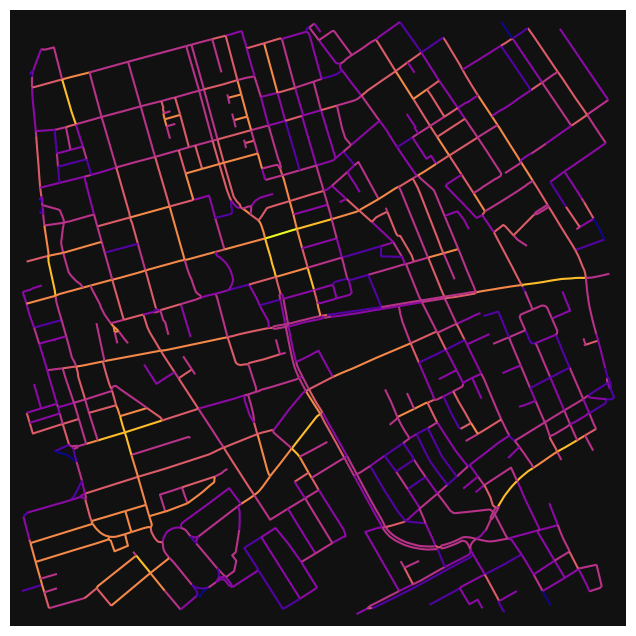


Which street edge has the highest degree? Look for the brightest yellow segments!


In [26]:
# Visualize edge degree centrality
ec = ox.plot.get_edge_colors_by_attr(G1, 'dc', cmap='plasma')
fig, ax = ox.plot_graph(G1, 
                        node_size=0, 
                        node_color='w', 
                        node_edgecolor='gray', 
                        node_zorder=2,
                        edge_color=ec, 
                        edge_linewidth=1.5, 
                        edge_alpha=1)

print("\nWhich street edge has the highest degree? Look for the brightest yellow segments!")

### Edge-Level Closeness Centrality

**Closeness centrality** measures how close a location is to all other locations.

For streets:
- **High closeness** = Street is centrally located, close to all other streets
- **Low closeness** = Street is on the periphery of the network

In [27]:
# Calculate edge closeness centrality
edge_cc = nx.closeness_centrality(nx.line_graph(DG))

# Set as edge attribute
nx.set_edge_attributes(DG, edge_cc, 'cc')
G1 = nx.MultiGraph(DG)

print("Top 5 street segments by closeness centrality:")
for edge, cc in sorted(edge_cc.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"  Edge {edge}: {cc:.4f}")

Top 5 street segments by closeness centrality:
  Edge (1684410049, 9045696930): 0.0750
  Edge (1684410049, 9791495): 0.0750
  Edge (9045696930, 25496587): 0.0745
  Edge (9045696930, 1684410049): 0.0745
  Edge (9791495, 9791496): 0.0745


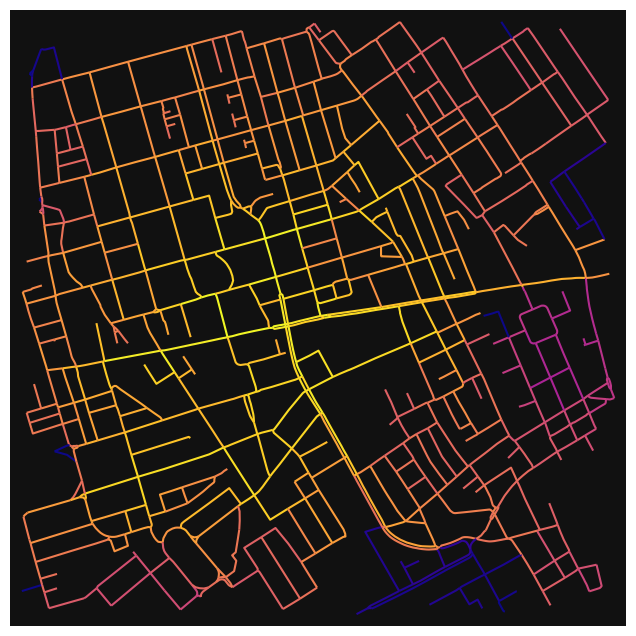


Where is the geometric center of the network? Look for yellow streets near Oxford Circus!


In [28]:
# Visualize edge closeness centrality
ec = ox.plot.get_edge_colors_by_attr(G1, 'cc', cmap='plasma')
fig, ax = ox.plot_graph(G1, 
                        node_size=0, 
                        node_color='w', 
                        node_edgecolor='gray', 
                        node_zorder=2,
                        edge_color=ec, 
                        edge_linewidth=1.5, 
                        edge_alpha=1)

print("\nWhere is the geometric center of the network? Look for yellow streets near Oxford Circus!")

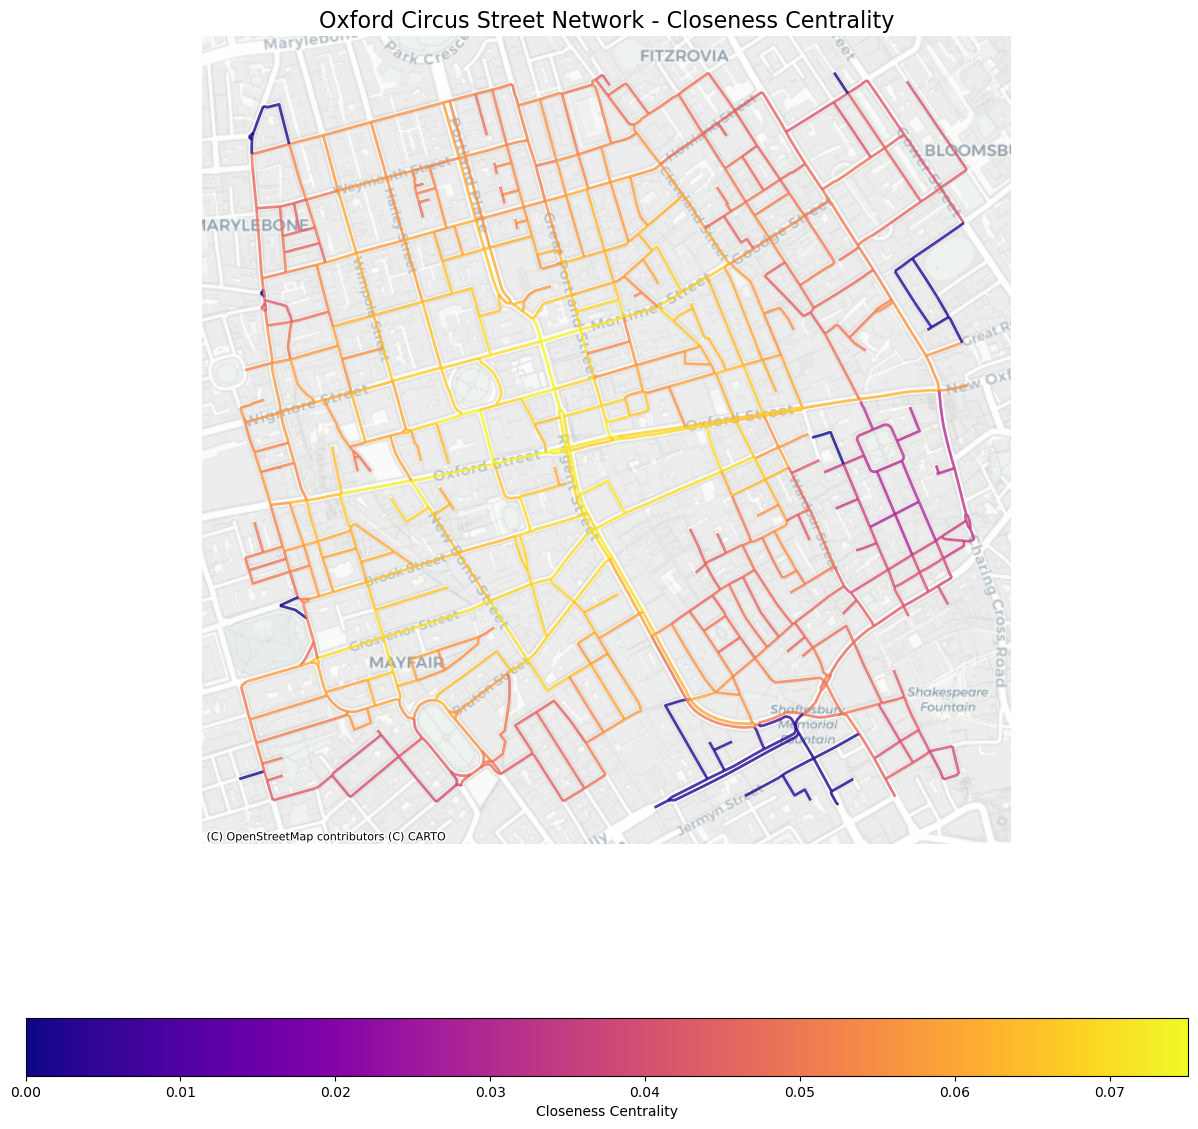

In [29]:

gdf_edges = ox.graph_to_gdfs(G1, nodes=False, fill_edge_geometry=True)

# Transform to EPSG:3857 (required for contextily basemaps)
gdf_edges = gdf_edges.to_crs(epsg=3857)

# Create plot with basemap
fig, ax = plt.subplots(figsize=(15, 15))

# Plot edges colored by closeness centrality
gdf_edges.plot(column='cc', 
               cmap='plasma', 
               linewidth=2, 
               alpha=0.8, 
               ax=ax,
               legend=True,
               legend_kwds={'label': 'Closeness Centrality', 'orientation': 'horizontal'})

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Oxford Circus Street Network - Closeness Centrality", fontsize=16)
plt.axis('off')
plt.show()

**What do you notice?**

Streets with high closeness centrality (yellow) are near the **geometric center** of the network. In this case, streets around Oxford Circus station show high closeness - they're centrally located and easily accessible from all directions.

### Edge-Level Betweenness Centrality

**Betweenness centrality** measures how often a location appears on shortest paths between other locations.

For streets:
- **High betweenness** = Street is frequently used as a through-route
- **Low betweenness** = Street is rarely part of shortest paths (might be a dead-end or local road)


In [30]:
# Use the same graph as closeness centrality (G_small / DG from above)
# This ensures consistent comparison between centrality measures

print(f"Network size for betweenness centrality:")
print(f"  Nodes: {DG.number_of_nodes():,}")
print(f"  Edges: {DG.number_of_edges():,}")
print(f"\nCalculating betweenness centrality... (this may take 30-60 seconds)")

Network size for betweenness centrality:
  Nodes: 595
  Edges: 1,170

Calculating betweenness centrality... (this may take 30-60 seconds)


In [31]:
# Calculate edge betweenness centrality
# Warning: This can be slow! Stop if it takes too long.
edge_bc = nx.betweenness_centrality(nx.line_graph(DG))

# Set as edge attribute
nx.set_edge_attributes(DG, edge_bc, 'bc')
G_multi = nx.MultiGraph(DG)

print("\nTop 5 street segments by betweenness centrality:")
for edge, bc in sorted(edge_bc.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"  Edge {edge}: {bc:.4f}")


Top 5 street segments by betweenness centrality:
  Edge (4347844147, 881888130): 0.1206
  Edge (881888130, 108058): 0.1175
  Edge (4347844152, 4347844147): 0.1158
  Edge (9521035, 108062): 0.1126
  Edge (9521025, 9791492): 0.1085


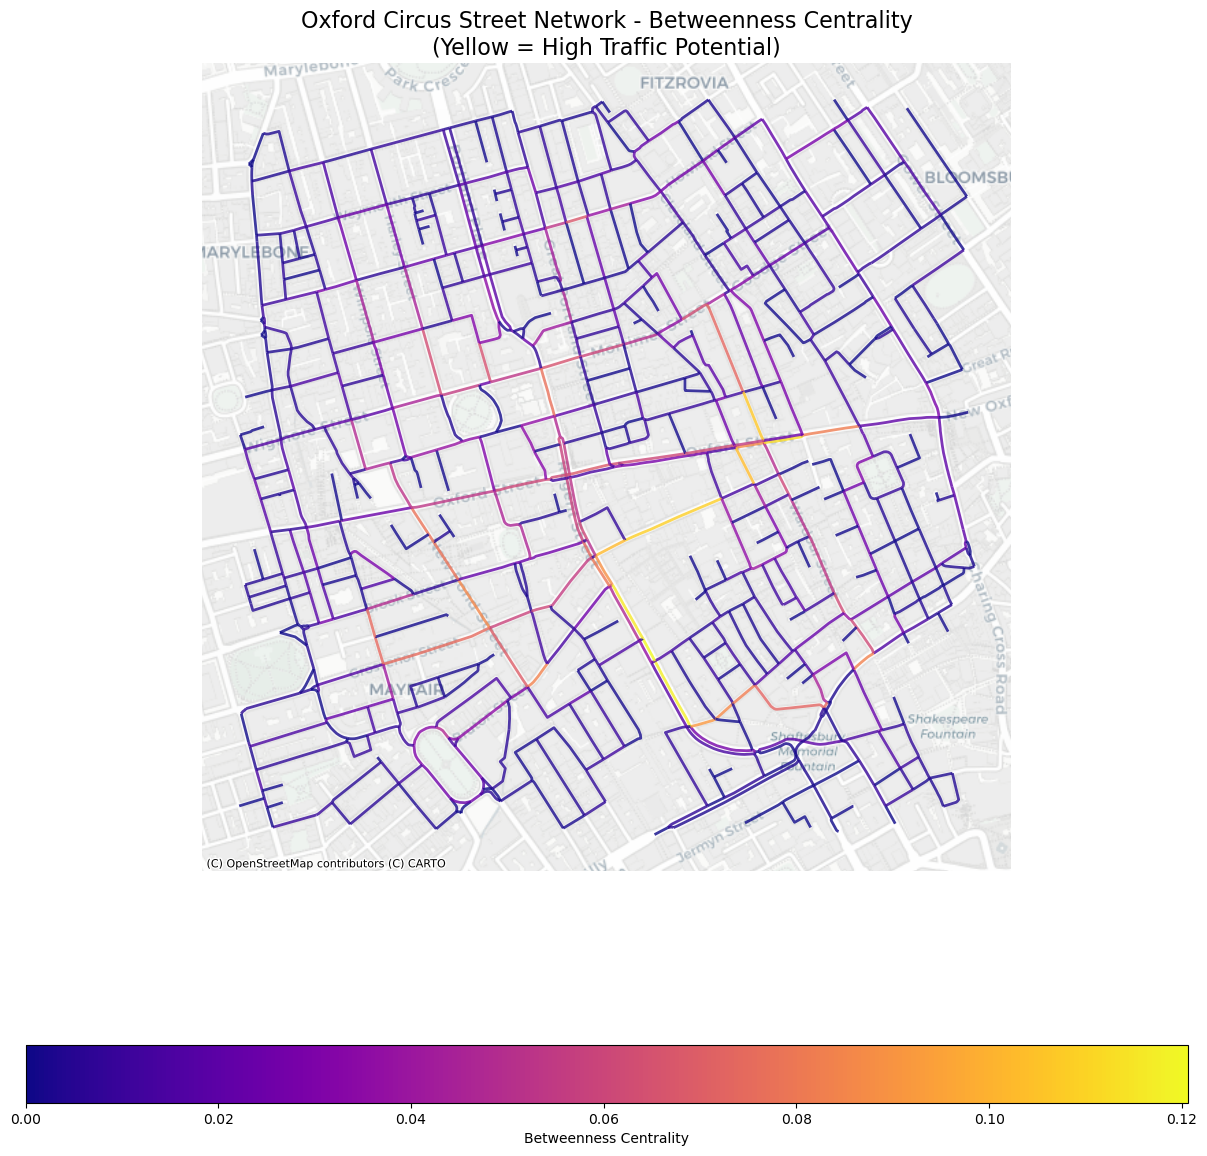

In [32]:
# Convert to GeoDataFrame and plot with basemap
gdf_edges_bc = ox.graph_to_gdfs(G_multi, nodes=False, fill_edge_geometry=True)
gdf_edges_bc = gdf_edges_bc.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(15, 15))

# Plot betweenness centrality
gdf_edges_bc.plot(column='bc', 
                  cmap='plasma', 
                  linewidth=2, 
                  alpha=0.8, 
                  ax=ax,
                  legend=True,
                  legend_kwds={'label': 'Betweenness Centrality', 'orientation': 'horizontal'})

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Oxford Circus Street Network - Betweenness Centrality\n(Yellow = High Traffic Potential)", fontsize=16)
plt.axis('off')
plt.show()

**Interpretation**:

For this small graph in London, **Regent Street** shows high betweenness centrality. This suggests:
- It's a major through-route
- Many shortest paths pass through it
- It has higher probability of being traversed (based purely on network configuration)
- It's likely to experience more traffic

#### 🤨 TASK
Run the same centrality analysis for another city. Create a new graph `G_task` with `dist=800m` to keep computation time reasonable.

Suggestions: 'Times Square, New York', 'Shibuya, Tokyo', 'Champs-Élysées, Paris'

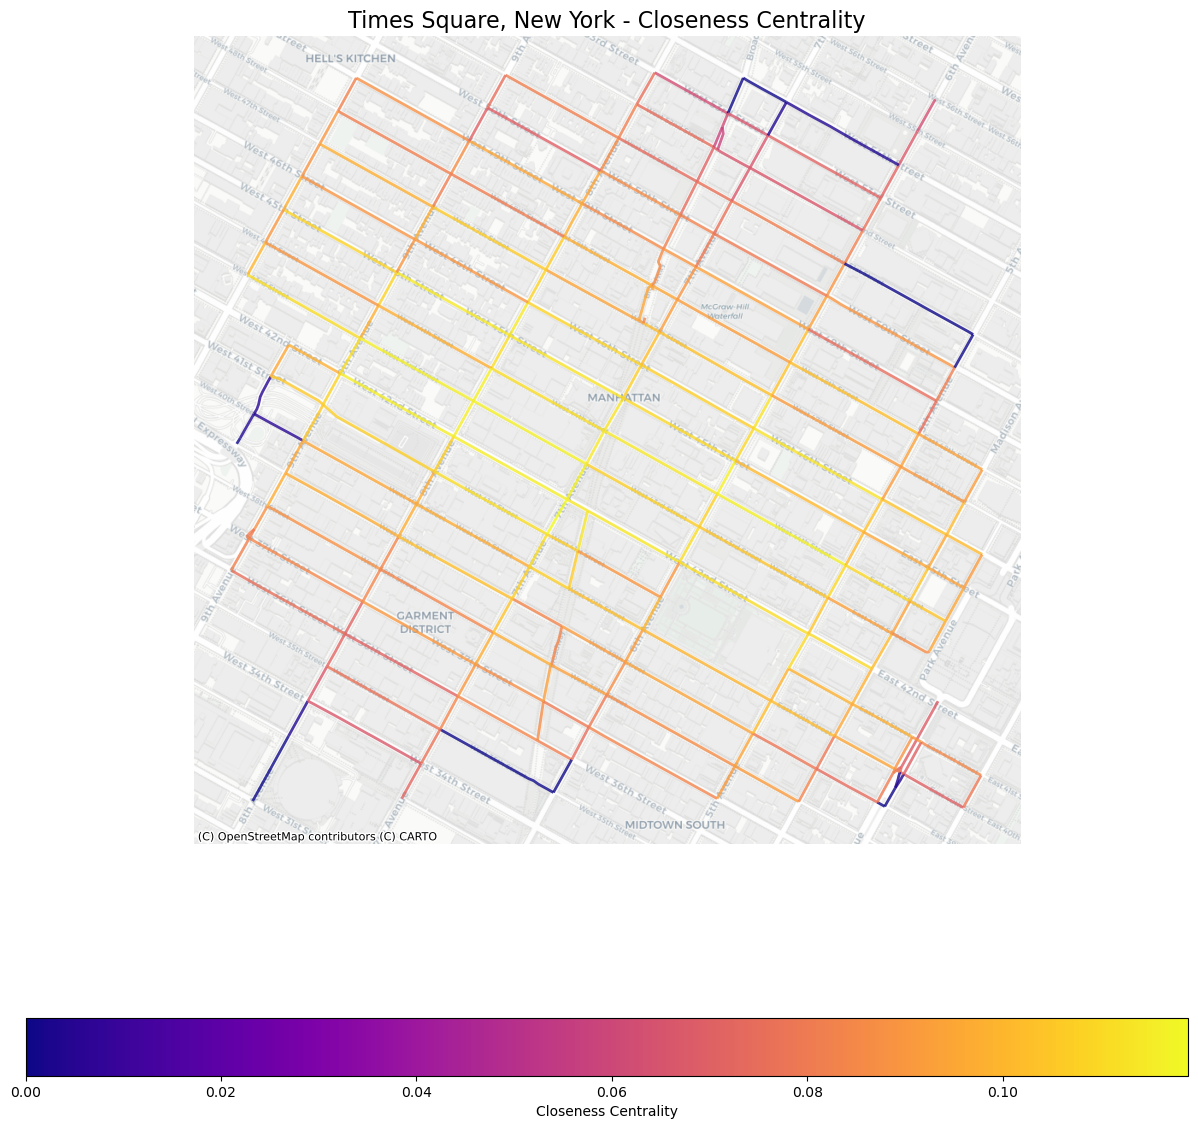

In [33]:
# Task: Analyze another city's street network
# Choose your own location!

location = 'Times Square, New York'  # Change this to your choice

# Download network
G_task = ox.graph_from_address(location, dist=800, network_type='drive')
DG_task = ox.convert.to_digraph(G_task)

# Calculate edge closeness centrality
edge_cc_task = nx.closeness_centrality(nx.line_graph(DG_task))
nx.set_edge_attributes(DG_task, edge_cc_task, 'cc')
G_task_multi = nx.MultiGraph(DG_task)

# Convert to GeoDataFrame and plot
gdf_task = ox.graph_to_gdfs(G_task_multi, nodes=False, fill_edge_geometry=True)
gdf_task = gdf_task.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(15, 15))
gdf_task.plot(column='cc', cmap='plasma', linewidth=2, alpha=0.8, ax=ax,
              legend=True, legend_kwds={'label': 'Closeness Centrality', 'orientation': 'horizontal'})
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title(f"{location} - Closeness Centrality", fontsize=16)
plt.axis('off')
plt.show()

## Extracting OSM Features (Buildings, Amenities)

OSMnx can download more than just street networks. The `geometries` module allows you to get buildings, parks, amenities, and more from OpenStreetMap.

**Important note**: Building and land-use data quality varies by location. It's not as complete as street network data.

In [34]:
# Download multiple feature types for Cambridge
tags = {'amenity': True, 'highway': True, 'landuse': True, 
        'building': True, 'waterway': True, 'railway': True}

all_geom = ox.features_from_address('Cambridge, UK', tags, dist=1000)

# Transform to Web Mercator for mapping
all_geom = all_geom.to_crs(epsg=3857)

print(f"Downloaded {len(all_geom)} features")
print(f"Geometry types: {all_geom.geometry.type.unique()}")

Downloaded 9824 features
Geometry types: ['Point' 'Polygon' 'MultiPolygon' 'LineString']


### Visualizing Buildings

Let's filter for buildings only and create a map.

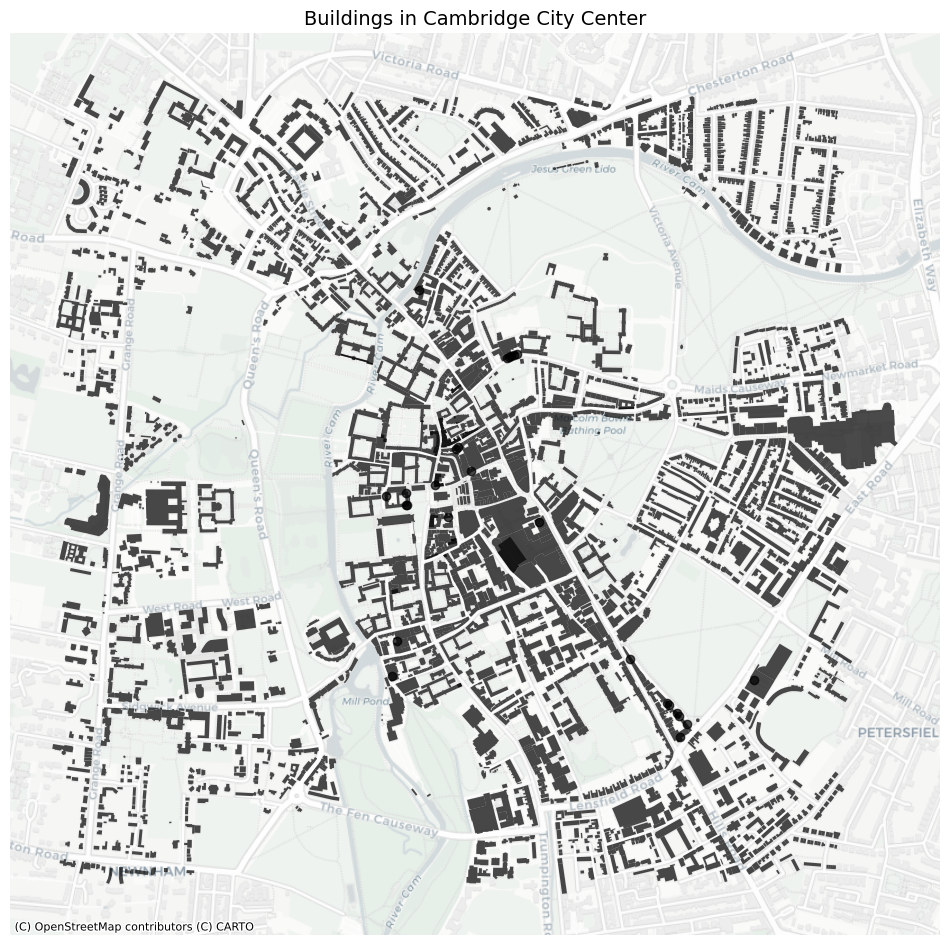

In [35]:
# Plot all buildings in Cambridge
fig, ax = plt.subplots(figsize=(12, 12))

all_geom[all_geom['building'].notna()].plot(ax=ax, color='black', alpha=0.7)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Buildings in Cambridge City Center", fontsize=14)
plt.axis('off')
plt.show()

### Analyzing Building Types

OpenStreetMap tags buildings with types (university, residential, commercial, etc.). Let's visualize this.

In [ ]:
# Plot buildings colored by type
fig, ax = plt.subplots(figsize=(12, 12))

all_geom[all_geom['building'].notna()].plot(column='building',
                                            ax=ax,
                                            categorical=True,
                                            legend=True,
                                            legend_kwds={'loc': 'upper right', 'fontsize': 8},
                                            alpha=0.7)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Buildings in Cambridge by Type", fontsize=14)
plt.axis('off')
plt.show()

### Filtering Specific Building Types

Let's isolate university buildings specifically.

In [ ]:
# Filter for university buildings only
fig, ax = plt.subplots(figsize=(12, 12))

# Filter where 'building' column contains 'university'
university_buildings = all_geom[
    all_geom['building'].notna() & 
    all_geom['building'].str.contains('university', case=False, na=False)
]

university_buildings.plot(ax=ax, color='darkblue', alpha=0.8, edgecolor='white', linewidth=0.5)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title(f"University Buildings in Cambridge ({len(university_buildings)} buildings)", fontsize=14)
plt.axis('off')
plt.show()

## Lab Exercise 3.2: Street Networks in London

### Exercise Tasks

**a)** Get two street-network graphs of the area around Bank tube station, up to a radius of 1000m: one for walking, and one for driving.

**b)** Calculate closeness, betweenness and degree centrality for the edges in the driving network graph.

**c)** Visualize the three centrality measures separately and save each image as a PNG file.

**d)** Calculate the shortest path from Bank station to Tate Modern by foot (`walk`).

**e)** Calculate the shortest path from Bank station to Tate Modern by car (`drive`).

**f)** Calculate the difference in length between these two shortest-path routes. [Hint: use `nx.shortest_path_length()`]

**g)** Download buildings within 1000m of Bank in London and create a histogram of building areas.

**h)** Download buildings within 1000m of Trafalgar Square in London and create a histogram of building areas.

---



In [ ]:
# Solution 3a: Get two networks around Bank station
G_drive = ox.graph_from_address('Bank, London, UK', dist=1000, network_type='drive')
G_walk = ox.graph_from_address('Bank, London, UK', dist=1000, network_type='walk')

print(f"Driving network: {G_drive.number_of_nodes():,} nodes, {G_drive.number_of_edges():,} edges")
print(f"Walking network: {G_walk.number_of_nodes():,} nodes, {G_walk.number_of_edges():,} edges")

# Convert driving network to DiGraph for centrality analysis
DG_drive = ox.convert.to_digraph(G_drive)

In [ ]:
# Solution 3b: Calculate three centrality measures for edges

# Betweenness centrality
edge_bc = nx.betweenness_centrality(nx.line_graph(DG_drive))
nx.set_edge_attributes(DG_drive, edge_bc, 'bc')

# Closeness centrality
edge_cc = nx.closeness_centrality(nx.line_graph(DG_drive))
nx.set_edge_attributes(DG_drive, edge_cc, 'cc')


# Degree centrality
edge_dc = nx.degree_centrality(nx.line_graph(DG_drive))
nx.set_edge_attributes(DG_drive, edge_dc, 'dc')

# Convert back to MultiGraph
G_drive_multi = nx.MultiGraph(DG_drive)

In [ ]:
# Solution 3c: Visualize closeness centrality
nc = ox.plot.get_edge_colors_by_attr(G_drive_multi, 'cc', cmap='plasma')
fig, ax = ox.plot_graph(G_drive_multi, 
                        node_size=0, 
                        node_color='w', 
                        node_edgecolor='gray', 
                        node_zorder=2,
                        edge_color=nc, 
                        edge_linewidth=1.5, 
                        edge_alpha=1)

**Interpretation: Closeness Centrality**

Closeness centrality indicates how close a location is to all other locations in the road network. High closeness centrality (yellow) means the street is relatively closer to all other locations, suggesting it's centrally located within the network. The yellower streets near Bank tube station are more centrally located for this particular street network.

In [ ]:
# Solution 3c: Visualize betweenness centrality
nc = ox.plot.get_edge_colors_by_attr(G_drive_multi, 'bc', cmap='plasma')
fig, ax = ox.plot_graph(G_drive_multi, 
                        node_size=0, 
                        node_color='w', 
                        node_edgecolor='gray', 
                        node_zorder=2,
                        edge_color=nc, 
                        edge_linewidth=1.5, 
                        edge_alpha=1)

**Interpretation: Betweenness Centrality**

Betweenness centrality measures the extent to which a location lies on paths between other locations. Streets with high betweenness centrality (yellow) frequently appear on shortest paths between other streets. Such locations are crucial for traffic flow within the network. The yellower streets have likely higher movement potential.

In [ ]:
# Solution 3c: Visualize degree centrality
nc = ox.plot.get_edge_colors_by_attr(G_drive_multi, 'dc', cmap='plasma')
fig, ax = ox.plot_graph(G_drive_multi, 
                        node_size=0, 
                        node_color='w', 
                        node_edgecolor='gray', 
                        node_zorder=2,
                        edge_color=nc, 
                        edge_linewidth=1.5, 
                        edge_alpha=1)

**Interpretation: Degree Centrality**

Degree centrality refers to the number of direct connections a location has with other locations. A location with high degree centrality (yellow) indicates a highly accessible or connected location. Which street is the most connected?

In [ ]:
# Solution 3d: Shortest path from Bank to Tate Modern by foot
# Get coordinates
origin_point = ox.geocode('Bank Station, London, UK')
destination_point = ox.geocode('Tate Modern, London, UK')

# Find nearest nodes in walking network
origin_node = ox.distance.nearest_nodes(G_walk, X=origin_point[1], Y=origin_point[0])
destination_node = ox.distance.nearest_nodes(G_walk, X=destination_point[1], Y=destination_point[0])

# Find shortest path
route_walk = nx.shortest_path(G_walk, origin_node, destination_node, weight='length')
route_length_walk = nx.shortest_path_length(G_walk, origin_node, destination_node, weight='length')

print(f"Walking route from Bank to Tate Modern:")
print(f"  Number of nodes: {len(route_walk)}")
print(f"  Total length: {route_length_walk:.0f} meters ({route_length_walk/1000:.2f} km)")

# Plot the route
fig, ax = ox.plot_graph_route(G_walk, route_walk, 
                               route_color='blue', 
                               route_linewidth=3,
                               node_size=0,
                               bgcolor='white',
                               edge_color='gray',
                               edge_linewidth=0.5,
                               figsize=(15, 15))

In [ ]:
# Solution 3e: Shortest path from Bank to Tate Modern by car
# Find nearest nodes in driving network
origin_node_drive = ox.distance.nearest_nodes(G_drive, X=origin_point[1], Y=origin_point[0])
destination_node_drive = ox.distance.nearest_nodes(G_drive, X=destination_point[1], Y=destination_point[0])

# Find shortest path
route_drive = nx.shortest_path(G_drive, origin_node_drive, destination_node_drive, weight='length')
route_length_drive = nx.shortest_path_length(G_drive, origin_node_drive, destination_node_drive, weight='length')

print(f"Driving route from Bank to Tate Modern:")
print(f"  Number of nodes: {len(route_drive)}")
print(f"  Total length: {route_length_drive:.0f} meters ({route_length_drive/1000:.2f} km)")

# Plot the route
fig, ax = ox.plot_graph_route(G_drive, route_drive, 
                               route_color='red', 
                               route_linewidth=3,
                               node_size=0,
                               bgcolor='white',
                               edge_color='gray',
                               edge_linewidth=0.5,
                               figsize=(15, 15))

In [ ]:
# Solution 3f: Calculate the difference in route lengths
length_difference = route_length_drive - route_length_walk

print(f"Route Length Comparison:")
print(f"  Walking route: {route_length_walk:.0f}m ({route_length_walk/1000:.2f}km)")
print(f"  Driving route: {route_length_drive:.0f}m ({route_length_drive/1000:.2f}km)")
print(f"  Difference: {length_difference:.0f}m ({length_difference/1000:.2f}km)")
print(f"\nThe driving route is {length_difference:.0f}m longer than the walking route.")
# Why? Some edges in the road network (like the Millennium Bridge) are pedestrian-only.

In [ ]:
# Solution 3g: Building areas histogram for Bank
tags = {'amenity': True, 'highway': True, 'landuse': True, 
        'building': True, 'waterway': True, 'railway': True}

all_geom_bank = ox.features_from_address('Bank, London, UK', tags, dist=1000)
all_geom_bank = all_geom_bank.to_crs(epsg=3857)

print(f"Geometry types in Bank area: {all_geom_bank.geometry.type.unique()}")

# Filter for polygons only (buildings are polygons)
geom_bank = all_geom_bank[
    (all_geom_bank.geometry.type == 'Polygon') | 
    (all_geom_bank.geometry.type == 'MultiPolygon')
]

# Drop duplicates
geom_bank = geom_bank.drop_duplicates(subset=['geometry'])

# Plot buildings
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Map of buildings
geom_bank[geom_bank['building'].notna()].plot(ax=ax1, color='black', alpha=0.7)
ax1.axis('off')
ax1.set_title("Buildings near Bank Station", fontsize=14)

# Histogram of building areas
ax2.hist(geom_bank[geom_bank['building'].notna()].area, bins=30, color='black', edgecolor='white')
ax2.set_xlabel("Building Area (m²)", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_title("Distribution of Building Areas - Bank", fontsize=14)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nBuilding statistics for Bank area:")
print(f"  Total buildings: {len(geom_bank[geom_bank['building'].notna()])}")
print(f"  Mean area: {geom_bank[geom_bank['building'].notna()].area.mean():.0f} m²")
print(f"  Median area: {geom_bank[geom_bank['building'].notna()].area.median():.0f} m²")

In [ ]:
# Solution 3h: Building areas histogram for Trafalgar Square
all_geom_traf = ox.features_from_address('Trafalgar Square, London, UK', tags, dist=1000)
all_geom_traf = all_geom_traf.to_crs(epsg=3857)

# Filter for polygons
geom_traf = all_geom_traf[
    (all_geom_traf.geometry.type == 'Polygon') | 
    (all_geom_traf.geometry.type == 'MultiPolygon')
]

# Drop duplicates
geom_traf = geom_traf.drop_duplicates(subset=['geometry'])

# Plot buildings
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Map of buildings
geom_traf[geom_traf['building'].notna()].plot(ax=ax1, color='black', alpha=0.7)
ax1.axis('off')
ax1.set_title("Buildings near Trafalgar Square", fontsize=14)

# Histogram of building areas
ax2.hist(geom_traf[geom_traf['building'].notna()].area, bins=30, color='black', edgecolor='white')
ax2.set_xlabel("Building Area (m²)", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_title("Distribution of Building Areas - Trafalgar Square", fontsize=14)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nBuilding statistics for Trafalgar Square area:")
print(f"  Total buildings: {len(geom_traf[geom_traf['building'].notna()])}")
print(f"  Mean area: {geom_traf[geom_traf['building'].notna()].area.mean():.0f} m²")
print(f"  Median area: {geom_traf[geom_traf['building'].notna()].area.median():.0f} m²")